# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
df_x_train= pd.read_csv('.\Arq_UCI\X_train_new.txt')
df_x_test= pd.read_csv('.\Arq_UCI\X_test_new.txt')
df_y_train=pd.read_csv(r'.\Arq_UCI\y_train.txt',header=None)
df_y_test=pd.read_csv(r'.\Arq_UCI\y_test.txt',header=None)


In [3]:
df_x_train.reset_index(inplace = True)
df_x_train.set_index(['index','individuo'],inplace=True,drop=True)
df_x_test.reset_index(inplace = True)
df_x_test.set_index(['index','individuo'],inplace=True,drop=True)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
df_x_train_, df_x_valid, df_y_train_, df_y_valid = train_test_split(df_x_train,df_y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
caminho = DecisionTreeClassifier(max_depth=4,random_state=2360873).cost_complexity_pruning_path(df_x_train_,df_y_train_)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [6]:
ccp_alphas

array([0.        , 0.00391184, 0.00751448, 0.01180386, 0.08237604,
       0.08884671, 0.1138304 , 0.16755691, 0.1853135 ])

In [7]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(df_x_train_, df_y_train_)
    clfs.append(clf)

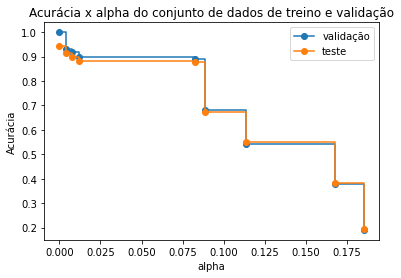

In [8]:
train_scores = [clf.score(df_x_train_, df_y_train_) for clf in clfs]
valid_scores = [clf.score(df_x_valid, df_y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [9]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 94.56


DecisionTreeClassifier(random_state=2360873)

Acurácia: 84.46


C:\Users\hgussi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


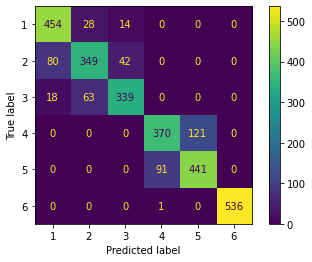

In [10]:
acuracia_teste = melhor_arvore.score(df_x_test, df_y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, df_x_test, df_y_test);

In [11]:
#clfs[ind_melhor_arvore].feature_importances_
featuresfeature_importances_df = pd.DataFrame({"feature": list(df_x_train_.columns), "importance": clfs[ind_melhor_arvore].feature_importances_}).sort_values("importance", ascending=False)
featuresfeature_importances_df.head(5)

,feature,importance
57,57 tGravityAcc-energy()-X,0.223071
390,"390 fBodyAccJerk-bandsEnergy()-1,16",0.201696
560,"560 angle(Y,gravityMean)",0.142106
202,202 tBodyAccMag-std(),0.106949
75,"75 tGravityAcc-arCoeff()-Z,2",0.099160


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [12]:
#preparando dados
x_train =df_x_train_.iloc[:,[57,390,560]]
x_valid =df_x_valid.iloc[:,[57,390,560]]


In [13]:
#calculo ccp_alphas
caminho = DecisionTreeClassifier(max_depth=4,random_state=2360873).cost_complexity_pruning_path(x_train,df_y_train_)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas

array([0.        , 0.00115172, 0.00692424, 0.00736077, 0.03501672,
       0.06255012, 0.1138304 , 0.16755691, 0.1853135 ])

In [14]:
#Arvores
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(x_train, df_y_train_)
    clfs.append(clf)

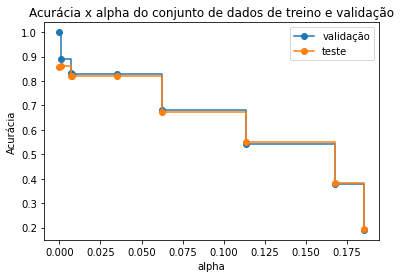

In [15]:
#Acurácia
train_scores = [clf.score(x_train, df_y_train_) for clf in clfs]
valid_scores = [clf.score(x_valid, df_y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
#melhor Arvore
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 86.18


DecisionTreeClassifier(ccp_alpha=0.0011517234961853327, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [17]:
#preparar dados de teste
x_test =df_x_test.iloc[:,[57,390,560]]


Acurácia: 69.66


C:\Users\hgussi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


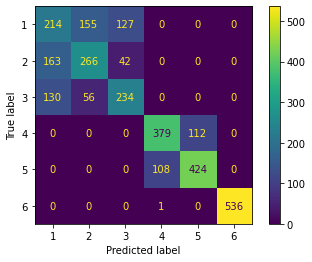

In [18]:
acuracia_teste = melhor_arvore.score(x_test, df_y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, x_test, df_y_test);

#### Acurácia caiu de  86,18% para 69,66%, como aprendido já é esperado.